In [1]:
import gym
import numpy as np
import torch
from agent import Agent
import matplotlib.pyplot as plt

In [2]:
if __name__ == '__main__':
    env_id = 'CartPole-v0'
    random_seed = 0
    torch.manual_seed(random_seed)
    np.random.seed(random_seed)
    env = gym.make(env_id)
    eval_env = gym.make(env_id)
    env.seed(random_seed)
    eval_env.seed(random_seed)
    N = 2048
    batch_size = 64
    n_epochs = 10
    alpha = 0.0003
    agent = Agent(n_actions=env.action_space.n, batch_size=batch_size,
                  alpha=alpha, n_epochs=n_epochs,
                  input_dims=(env.observation_space.shape))

    score_history = []
    max_steps = 200e3
    total_steps = 0
    traj_length = 0
    episode = 1

    # for i in range(n_games):
    while total_steps < max_steps:
        observation = env.reset()
        done = False
        score = 0
        while not done:
            action, prob = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            total_steps += 1
            traj_length += 1
            score += reward
            agent.remember(observation, observation_, action, prob, reward, done)
            if traj_length % N == 0:
                agent.learn()
                traj_length = 0
            observation = observation_
        score_history.append(score)
        avg_score = np.mean(score_history[-100:])
        print('{} Episode {} total steps {} avg score {:.1f}'.
              format(env_id, episode, total_steps, avg_score))
        episode += 1

c:\Users\Lenovo\Desktop\Python\Reinforcement Learning\5. PPO\Discrete\agent.py:30: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  state = T.tensor([observation], dtype=T.float)


CartPole-v0 Episode 1 total steps 24 avg score 24.0
CartPole-v0 Episode 2 total steps 39 avg score 19.5
CartPole-v0 Episode 3 total steps 49 avg score 16.3
CartPole-v0 Episode 4 total steps 80 avg score 20.0
CartPole-v0 Episode 5 total steps 104 avg score 20.8
CartPole-v0 Episode 6 total steps 127 avg score 21.2
CartPole-v0 Episode 7 total steps 185 avg score 26.4
CartPole-v0 Episode 8 total steps 200 avg score 25.0
CartPole-v0 Episode 9 total steps 213 avg score 23.7
CartPole-v0 Episode 10 total steps 225 avg score 22.5
CartPole-v0 Episode 11 total steps 235 avg score 21.4
CartPole-v0 Episode 12 total steps 257 avg score 21.4
CartPole-v0 Episode 13 total steps 299 avg score 23.0
CartPole-v0 Episode 14 total steps 354 avg score 25.3
CartPole-v0 Episode 15 total steps 382 avg score 25.5
CartPole-v0 Episode 16 total steps 399 avg score 24.9
CartPole-v0 Episode 17 total steps 409 avg score 24.1
CartPole-v0 Episode 18 total steps 421 avg score 23.4
CartPole-v0 Episode 19 total steps 432 av

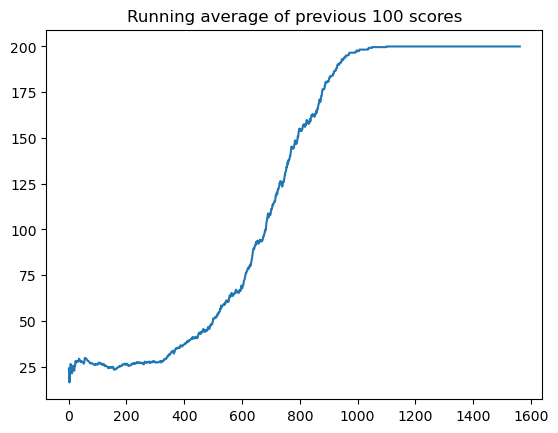

In [3]:
def plot_learning_curve(x, scores):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')

x = [i+1 for i in range(len(score_history))]
plot_learning_curve(x, score_history)